In [10]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [11]:
import mglearn

In [12]:
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits["data"], digits["target"], random_state=0)

lr = LogisticRegression(max_iter=200).fit(X_train, y_train)
pred = lr.predict(X_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))

0.9533333333333334
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


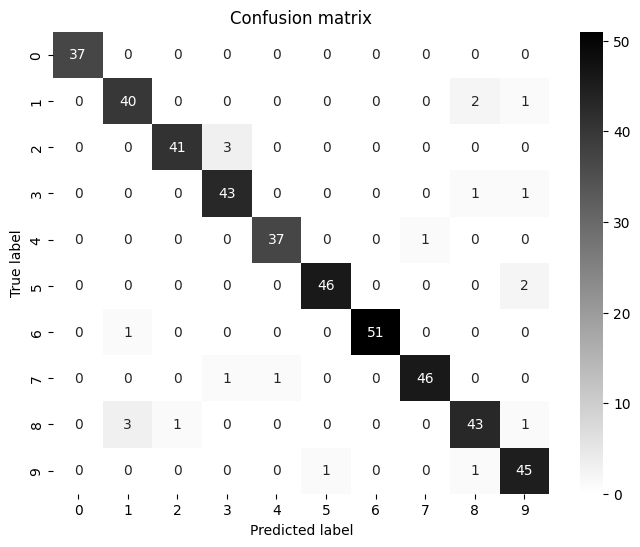

In [16]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# 混同行列の計算（この部分は変更なし）
cm = confusion_matrix(y_test, pred)

# --- mglearnの代わりにSeabornを使ってプロット ---
plt.figure(figsize=(8, 6)) # フィギュアのサイズを調整すると見やすい
sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.gray_r,
            xticklabels=digits["target_names"],
            yticklabels=digits["target_names"])

plt.title("Confusion matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show() # plt.show()でグラフを表示

In [17]:
from sklearn.metrics import classification_report

In [19]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [20]:
from sklearn.metrics import f1_score
print("Micro average f1 score: ", f1_score(y_test, pred, average="micro"))
print("Macro average f1 score: ", f1_score(y_test, pred, average="macro"))

Micro average f1 score:  0.9533333333333334
Macro average f1 score:  0.9541726998040257


In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

print("Default: ", cross_val_score(SVC(), digits["data"], digits["target"] == 9))

explicit_accuracy = cross_val_score(SVC(), digits["data"], digits["target"] == 9,
                                    scoring="accuracy")
print("Explicit: ", explicit_accuracy)

roc_auc = cross_val_score(SVC(), digits["data"], digits["target"] == 9,
                          scoring="roc_auc")
print("AUC: ", roc_auc)

Default:  [0.975      0.99166667 1.         0.99442897 0.98050139]
Explicit:  [0.975      0.99166667 1.         0.99442897 0.98050139]
AUC:  [0.99717078 0.99854252 1.         0.999828   0.98400413]


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(digits["data"], digits["target"] == 9, random_state=0)

param_grid = {"gamma": [0.0001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)

print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy): ", grid.best_score_)
print("Test set AUC: ", roc_auc_score(y_test, grid.decision_function(X_test)))
print("Test set accuracy: ", grid.score(X_test, y_test))

Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy):  0.975500481894534
Test set AUC:  0.9919222849902327
Test set accuracy:  0.9733333333333334


In [27]:
# AUCスコアを使う

grid = GridSearchCV(SVC(), param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)

print("\nGrid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC): ", grid.best_score_)
print("Test set AUC: ", grid.score(X_test, y_test))


Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score (AUC):  0.997999457969529
Test set AUC:  0.999524840293543


In [29]:
import sklearn.metrics # 利用可能なscoring文字列のリストを取得 
sorted(sklearn.metrics.get_scorer_names())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'd2_absolute_error_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_max_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 're